In [1]:
!pip list

Package             Version
------------------- --------------------
asttokens           2.4.1
certifi             2024.2.2
charset-normalizer  3.3.2
colorama            0.4.6
comm                0.2.2
contourpy           1.2.1
cycler              0.12.1
debugpy             1.8.1
decorator           5.1.1
exceptiongroup      1.2.1
executing           2.0.1
filelock            3.14.0
fonttools           4.51.0
fsspec              2024.5.0
gitdb               4.0.11
GitPython           3.1.43
idna                3.7
importlib-metadata  7.1.0
importlib-resources 6.4.0
intel-openmp        2021.4.0
ipykernel           6.29.4
ipython             8.18.1
jedi                0.19.1
jinja2              3.1.4
jupyter-client      8.6.1
jupyter-core        5.7.2
kiwisolver          1.4.5
lxml                4.6.3
MarkupSafe          2.1.5
matplotlib          3.8.4
matplotlib-inline   0.1.7
mkl                 2021.4.0
mpmath              1.3.0
nest-asyncio        1.6.0
networkx            3.2.1
num

You should consider upgrading via the 'e:\fyp-yolo\myenv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
import uuid   # Unique identifier
import os
import time

In [5]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
 #!cd yolov5 && python train.py --img 320 --batch 16 --epochs 50 --data dataset.yaml --weights yolov5s.pt --workers 2

In [17]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\kkt/.cache\torch\hub\master.zip
YOLOv5  2024-6-30 Python-3.9.1 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [18]:
img = os.path.join('data', 'images', 'spot.2.jpg')

In [19]:
img_path = r'E:\FYP-YOLO\data\images\crack.54.jpg'

In [20]:
img_path = r'E:\FYP-YOLO\data\tiles_images\images\captured_image_1716755731.6577668.png'

# Load the image
img = cv2.imread(img_path)

# Grayscale
gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding
_, threshold = cv2.threshold(gray_frame, 90, 255, cv2.THRESH_BINARY)

# Invert Image
invert1 = cv2.bitwise_not(threshold)

results = model(invert1)

In [21]:
results.print()

image 1/1: 480x640 3 crackss
Speed: 22.0ms pre-process, 371.9ms inference, 484.6ms NMS per image at shape (1, 3, 480, 640)


In [22]:
image_array = np.squeeze(results.render())

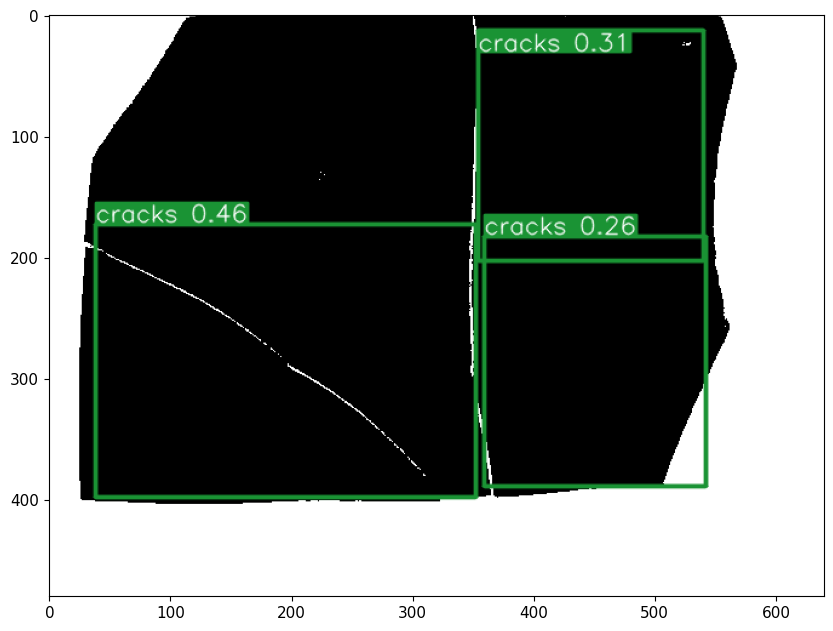

In [23]:
%matplotlib inline 
plt.imshow(image_array)
plt.gcf().set_size_inches(10, 10)
plt.imshow(np.squeeze(results.render()))
plt.show()

In [24]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, threshold = cv2.threshold(gray_frame, 90, 255, cv2.THRESH_BINARY)

    # Invert Image
    invert1 = cv2.bitwise_not(threshold)

    # Make detections 
    results = model(invert1)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()